In [ ]:
! pip install -U ydata-profiling
! pip install sweetviz
! pip install dtale

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.5/393.5 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 55.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=489f745cb7e464616b1bb9cae4768efdd6f9e731dd1c01e298f864371b9f912a
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ...

In [ ]:
import tensorflow as tf
import pandas as pd
from ydata_profiling import ProfileReport

import sweetviz as sv

import dtale

In [ ]:
# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Reshape data for EDA (flatten 28x28 images into 784 features)
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)


# # Convert to DataFrame for easier analysis
train_df = pd.DataFrame(x_train)
train_df['label'] = y_train

test_df = pd.DataFrame(x_test)
test_df['label'] = y_test

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
profile = ProfileReport(
    train_df.sample(200),
    title="Fashion MNIST Training Data Report",
    explorative=True,
    correlations=None,  # Disable correlation calculations
    interactions=None,  # Disable interaction calculations
)
profile.to_file("fashion_mnist_eda_report.html")

Summarize dataset: 100%|█████████▉| 790/793 [00:13<00:00, 92.03it/s, Detecting duplicates]     c:\Users\hemam\miniconda3\envs\mlops\lib\site-packages\ydata_profiling\model\pandas\duplicates_pandas.py:37: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

c:\Users\hemam\miniconda3\envs\mlops\lib\site-packages\ydata_profiling\model\pandas\duplicates_pandas.py:37: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

c:\Users\hemam\miniconda3\envs\mlops\lib\site-packages\ydata_profiling\model\pandas\duplicates_pandas.py:37: PerformanceWarning:


2025-03-11 07:27:05,430 - INFO     - Executing shutdown due to inactivity...
2025-03-11 07:27:17,764 - INFO     - Executing shutdown...
2025-03-11 07:27:17,768 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


In [ ]:
# Example: train_df should have 784 features and 1 label column
print(train_df.shape)  # Should output (60000, 785)
print(train_df.columns)  # Should show columns like 0, 1, ..., 783, 'label'

(60000, 785)
Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
           775,     776,     777,     778,     779,     780,     781,     782,
           783, 'label'],
      dtype='object', length=785)


In [ ]:
# Analyze a smaller subset of the data
report = sv.analyze(train_df.sample(1000), pairwise_analysis='on')
report.show_html("fashion_mnist_eda_report.html")

                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.11/dist-packages/sweetviz/graph_associations.py:219: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/usr/local/lib/python3.11/dist-packages/sweetviz/graph_associations.py:219: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/usr/local/lib/python3.11/dist-packages/sweetviz/graph_associations.py:219: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

In [ ]:


# Launch D-Tale for the training data
dtale.show(train_df).open_browser()

# Explainability

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.datasets import fashion_mnist
import shap
from sklearn.ensemble import RandomForestClassifier

In [2]:

# Load dataset
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

# Flatten images
train_X_flat = train_X.reshape(train_X.shape[0], -1)
test_X_flat = test_X.reshape(test_X.shape[0], -1)

# Normalization (0-1 scaling)
scaler = MinMaxScaler()
train_X_scaled = scaler.fit_transform(train_X_flat)
test_X_scaled = scaler.transform(test_X_flat)

# Convert to DataFrame for easier use with SHAP later
train_df = pd.DataFrame(train_X_scaled, columns=[f'pixel_{i}' for i in range(train_X_flat.shape[1])])
train_df['label'] = train_y


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


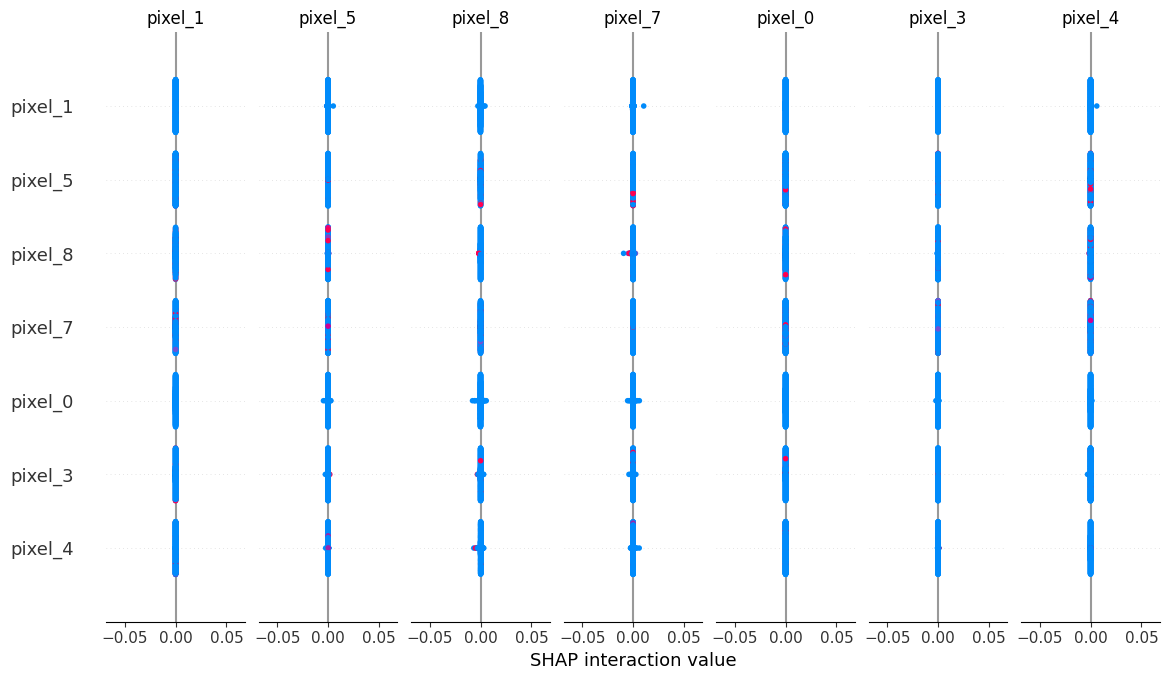

In [3]:

# Separate features and labels
X = train_df.drop('label', axis=1)
y = train_df['label']

# Fit Random Forest (for SHAP explanations)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# SHAP Explainability
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X.iloc[:500])  # Explain on a subset for speed

# Summary plot (shows overall important pixels)
shap.summary_plot(shap_values, X.iloc[:500])
